# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [17]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

from sklearn.linear_model import LinearRegression

import math

# Метрики
from sklearn import metrics

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
display(data.head(5))
display(data.info())

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(
C:\Users\User\AppData\Local\Temp\ipykernel_8144\1100188574.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(


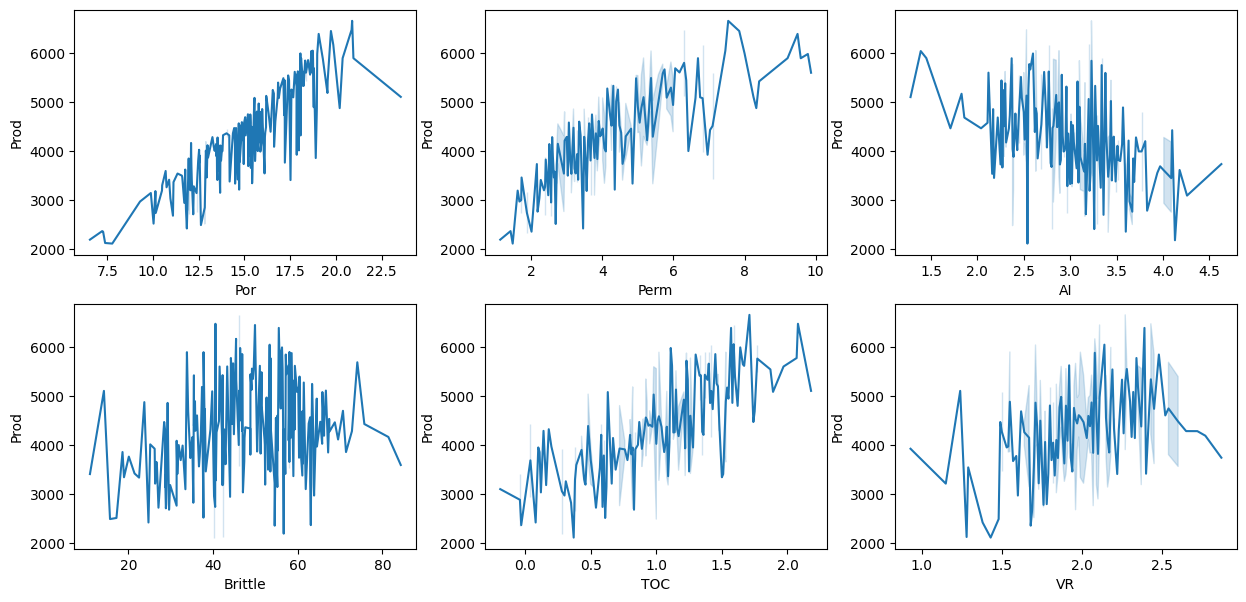

In [3]:
# Ваш код здесь
fig, (ax1) = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

fig = sns.lineplot(
    data = data,
    x = 'Por',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[0,0]
)
fig = sns.lineplot(
    data = data,
    x = 'Perm',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[0,1]
)
fig = sns.lineplot(
    data = data,
    x = 'AI',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[0,2]
)
fig = sns.lineplot(
    data = data,
    x = 'Brittle',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[1,0]
)
fig = sns.lineplot(
    data = data,
    x = 'TOC',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[1,1]
)
fig = sns.lineplot(
    data = data,
    x = 'VR',
    y = 'Prod',
    palette = 'tab10',
    ax=ax1[1,2]
)

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

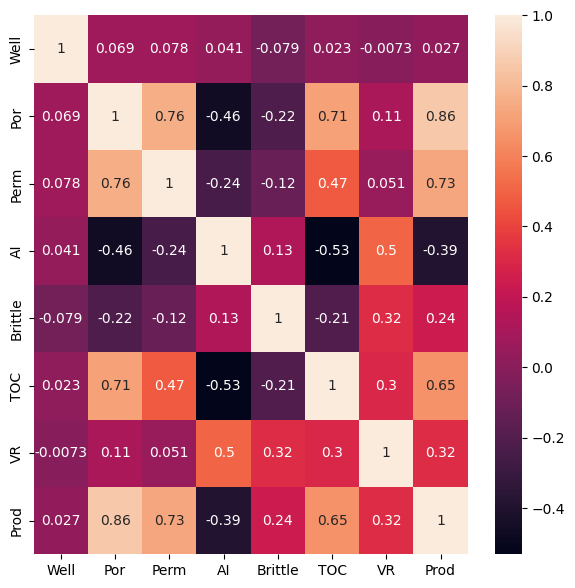

Ранг матрицы: 8
Определитель матрицы: 0.0007299388072652095


In [4]:
# Ваш код здесь
# Корреляционная матрица
plt.rcParams['figure.figsize'] = (7,7)
matrix_data = data.corr(numeric_only=True)

# Визуализация матрицы в тепловой карте
sns.heatmap(matrix_data, annot = True)
plt.show()

# Определяем ранг и определитель матрицы
print(f'Ранг матрицы: {np.linalg.matrix_rank(matrix_data)}')
print(f'Определитель матрицы: {np.linalg.det(matrix_data)}')

 *Ваши выводы здесь*

С целевой переменной сильнее всего коррелирует переменные пористость скважины(Por) и проницаемость скважины(Perm). Что логично, так как пористость и проницаемость влияют на то сколько получиться добыть газа.

Корреляция плохо обусловленная, так как ее определитель очень близок к нулю. 

Мультиколлинеарность есть между Por и Prod, Por и Perm, Por и TOC, Pord и Perm, между ними сильная связь. Коллинеарности чистой не видно.

В теории можно использовать линейную регрессию на таких данных, но не стоит. Так как нам нужно будет еще интерпретировать результат, а при мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми. Так же, чем больше мультиколлинеарных факторов, тем сильнее увеличивается разброс коэффициентов.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
# строим модель линейной регрессии
# составляем матрицу x и вектор целевой переменной y
x = np.column_stack((np.ones(200),data.drop(['Prod'], axis=1)))
y = data[['Prod']]
# вычисляем обратную матрицу, потом вектор коэффициентов
w_hat = np.linalg.inv(x.T@x)@x.T@y
print(w_hat.round())

     Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0


 *Ваши выводы здесь*

В модели есть несколько неинформативных признаков. Один признак Well можно сказать никак не влияет на модель, и 2 TOC и VR оказывают скорей шумовое влияние, если сравнить с другими коэффициентами.

Интерпретация: 

w0 = -1232 - имитирует влияние сторонних факторов, которые не учтены в модели. 

w1 = 0 - показывает, что идентификатор скважины не влияет на добычу газа. 

w2 = 230 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении пористость скважины на 1 единицу. Т.е. если пористость увеличится на 1 единицу, то медиана добычи увеличиться на 230 млн. кубических футов.

 w3 = 116 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении проницаемость скважины на 1 единицу. Т.е. если проницаемость увеличится на 1 единицу, то медиана добычи увеличиться на 116 млн. кубических футов.

  w4 = -365 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении акустического импеданса на 1 единицу. Т.е. если акустический импеданс  увеличится на 1 единицу, то медиана добычи уменьшится на 365 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [67]:
# Ваш код здесь
# скважина
# переведем тестовое значение в табличный вид
test_1 = pd.DataFrame({
    'Well': [106.0],
    'Por': [15.32],
    'Perm': [3.71],
    'AI': [3.29],
    'Brittle': [55.99],
    'TOC': [1.35],
    'VR': [2.42]
 })

# реальное значение
prod_test_1 = pd.Series([4748.315024])

# делаем предсказание
prod_test_1_predict = w_hat.iloc[0] + w_hat.iloc[1]*test_1["Well"][0] + w_hat.iloc[2]*test_1["Por"][0]\
    + w_hat.iloc[3]*test_1["Perm"][0] + w_hat.iloc[4]*test_1["AI"][0] + w_hat.iloc[5]*test_1["Brittle"][0]\
        + w_hat.iloc[6]*test_1["TOC"][0] + w_hat.iloc[7]*test_1["VR"][0]
        
print(prod_test_1_predict.values)

# реальное значение
prod_test_1 = pd.Series([4748.315024])

# вывод абсолютной ошибки
print(f"Абсолютная ошибка: {math.fabs(prod_test_1[0] - prod_test_1_predict[0])}")

# разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# вычесляем линейную регруссию вручную 
# вычисляем обратную матрицу, потом вектор коэффициентов
w_hat = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

# предсказанные значения записываем в переменную y_pred
y_pred = X_test@w_hat

# pассчитываем MAE
print('MAE score: {:.3f} млн. кубических футов'.format(metrics.mean_absolute_error(y_test, y_pred)))
# pассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred) * 100))

[4717.36441567]
Абсолютная ошибка: 30.950608329913848
MAE score: 142.906 млн. кубических футов
MAPE score: 3.541 %


 *Ваши выводы здесь*

Исходя из метрики MAE можно сделать вывод, что модель ошибается в среднем на 142.906 млн. кубических футов. Для понимания масштаба ошибки посмотрим сколько это в процентах, в этом нам поможет метрика MAPE. По ней видно, что предсказание отклоняется на 3.541 %.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

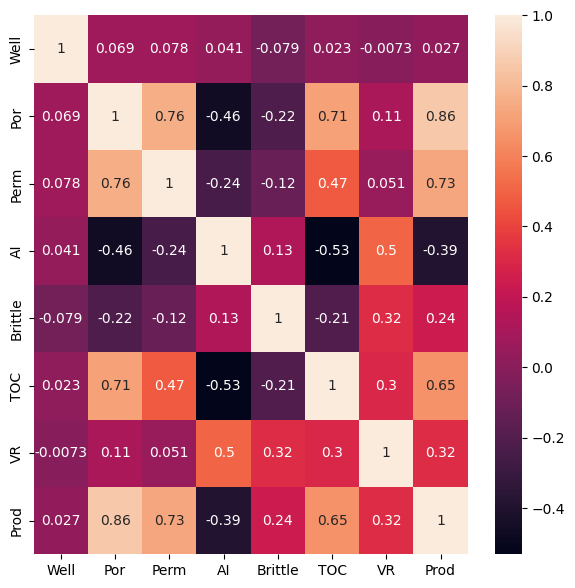

     Prod
0 -1321.0
1     0.0
2   238.0
3   112.0
4  -327.0
5    25.0
6   -42.0
7   702.0


In [8]:
# Ваш код здесь
# Корреляционная матрица
plt.rcParams["figure.figsize"] = (7,7)
matrix_data = data.corr(numeric_only=True)

# Визуализация матрицы в тепловой карте
sns.heatmap(matrix_data, annot = True)
plt.show()

print(w_hat.round())

 *Ваши выводы здесь*

В нашей модели есть факторы, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. Это TOC (общий органический углерод (%)), который по корреляции имеет прямую связь, а по коэффициентам модели обратную. Так же это VR(коэффициент отражения витринита) и Al(акустический импеданс), коэффициенты в модели которых намного больше чем должны быть по корреляции.

Предположу что причина такой разницы может заключаться в наличии нескольких параметров с  мультиколлинеарностью. Так как она влияет на коэффициенты линейной регрессии и делает их неустойчивыми, из-за чего может поменяться знак, а так же она может приводить к увеличению весов.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

     Prod
0 -1909.0
1   299.0
2  -187.0
3    27.0
4   496.0
MAE score: 171.021 млн. кубических футов
MAPE score: 4.178 %


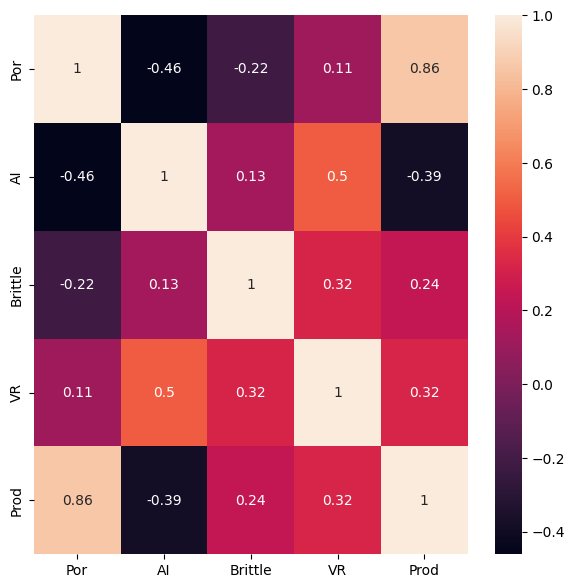

In [9]:
# Ваш код здесь
# удаляем не подходящие признаки
data_clean = data.drop(["Well", "Perm", "TOC"], axis=1)

# строим модель линейной регрессии
# составляем матрицу x и вектор целевой переменной y
x_new = np.column_stack((np.ones(200), data_clean.drop(["Prod"], axis=1)))
y_new = data_clean[["Prod"]]

# разбиваем данные
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split\
    (x_new, y_new, test_size=0.2, random_state=10)

# вычисляем обратную матрицу, потом вектор коэффициентов
w_hat_new = np.linalg.inv(X_new_train.T@X_new_train)@X_new_train.T@y_new_train
print(w_hat_new.round())

# Предсказанные значения записываем в переменную y_pred
y_pred_new = X_new_test@w_hat_new

# pассчитываем MAE
print('MAE score: {:.3f} млн. кубических футов'.format(metrics.mean_absolute_error\
    (y_new_test, y_pred_new)))

# pассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error\
    (y_new_test, y_pred_new) * 100))

# Посмотрим корреляцию после удаления лишних признкаов
# Корреляционная матрица
plt.rcParams["figure.figsize"] = (7,7)
data_clean = data.drop(["Well", "Perm", "TOC"], axis=1)
matrix_data = data_clean.corr(numeric_only=True)

# Визуализация матрицы в тепловой карте
sns.heatmap(matrix_data, annot = True)
plt.show()

 *Ваши выводы здесь*

Интерпретация

w0 = -1909 - имитирует влияние сторонних факторов, которые не учтены в модели. Значение увеличилось. 

w1 = 299 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении акустического импеданса на 1 единицу. Т.е. если увеличится на 1 единицу, то медиана добычи увеличиться на 299 млн. кубических футов. Значение если сравнить с предыдущем увеличилось.

w2 = -187 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении коэффициента хрупкости скважины на 1 единицу. Т.е. если он увеличится на 1 единицу, то медиана добычи уменьшиться на 187 млн. кубических футов. Значение уменьшилось.

 w3 = 27 - показывает на сколько в среднем изменится медиана добыча газа в сутки при увеличении коэффициента отражения витринита скважины на 1 единицу. Т.е. если он увеличится на 1 единицу, то медиана добычи увеличиться на 27 млн. кубических футов. Значение по сравнению с предыдущем увеличилось

Исходя из метрики MAE можно сделать вывод, что модель стала ошибаться в среднем на 171.021 млн. кубических футов. Для понимания масштаба ошибки посмотрим сколько это в процентах, в этом нам поможет метрика MAPE. По ней видно, что предсказание отклоняется на  4.178 %. Метрики увеличились, данная модель ошибается сильнее предыдущей.

Удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [10]:
# Ваш код здесь
# выделяем целевой признак от остальных
x_lin_reg = data_clean.drop(["Prod"], axis=1)
y_lin_reg = data_clean[["Prod"]]

# разбиваем данные
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(x_lin_reg, y_lin_reg, test_size=0.2, random_state=10)
# создаём модель линейной регрессии
model = LinearRegression()

# вычисляем коэффициенты регрессии
model.fit(X_lin_train, y_lin_train)
print('w_hat:', model.coef_)

lin_prediction = model.predict(X_lin_test)

# pассчитываем MAE
print("MAE score: {:.3f} млн. кубических футов".format(metrics.mean_absolute_error\
    (y_lin_test, lin_prediction)))
# pассчитываем MAPE
print("MAPE score: {:.3f} %".format(metrics.mean_absolute_percentage_error\
    (y_lin_test, lin_prediction) * 100))

w_hat: [[ 299.14294955 -187.46892976   27.24602541  495.63425505]]
MAE score: 171.021 млн. кубических футов
MAPE score: 4.178 %


 *Ваши выводы здесь*
 
Результат получился таким же. Метрики MAE и MAPE выросли. MAE стала равна 171.021 млн. кубических футов, а MAPE 4.178 %. Эта модель ошибается в среднем на  171.021 млн. кубических футов, что рвно чуть больше 4%.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [96]:
# Ваш код здесь
# Проводим стандартизацию StandardScaler
col_names = list(data_clean.columns) # rопируем названия столбцов
s_scaler = StandardScaler() # инициализируем стандартизатор StandardScaler
data_stan = s_scaler.fit_transform(data_clean) # кодируем исходный датасет
data_stan = pd.DataFrame(data_stan, columns=col_names) # преобразуем промежуточный в полноценный датафрейм

# выделяем целевой признак от остальных
x_poly = data_stan.drop(["Prod"], axis=1)
y_poly = data_stan[["Prod"]]

# генерируем полиномиальные признаки третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = pd.DataFrame(poly.fit_transform(x_poly))

# выведим результат, сколько факторов у вас получилось после генерации полиномиальных признаков
display("Колличество фолдов после генерации полиномиальных признаков: {}.".format(x_poly.shape[1]))

# создаём модель линейной регрессии
model = LinearRegression()

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results_mape = cross_validate(model, x_poly, y_poly, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape['test_score'].mean() * 100))

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results_mae = cross_validate(model, x_poly, y_poly, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print("MAE на тренировочных фолдах: {:.2f}".format(-cv_results_mae['train_score'].mean()))
print("MAE на валидационных фолдах: {:.2f}".format(-cv_results_mae['test_score'].mean()))

'Колличество фолдов после генерации полиномиальных признаков: 34.'

MAPE на тренировочных фолдах: 61.41 %
MAPE на валидационных фолдах: 77.61 %
MAE на тренировочных фолдах: 0.08
MAE на валидационных фолдах: 0.11


 *Ваши выводы здесь*
 
Результат метрик высокий, что говорит о сильной ошибке. Так MAPE на тренировочных фолдах: 61.41 %, а на валидационных фолдах: 77.61 %. И MAE на тренировочных фолдах: 0.08, на валидационных фолдах: 0.11. Показатели на валидационных фолдах и тренировочных отличаются примерно на 16%, при этом на тренировочных результат лучше, эта разница говорит о наличии переобучения.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [92]:
# Ваш код здесь
# подбираем параматр alpha
param_grid_lasso = [{"alpha" : [0.1, 0.3, 0.6, 0.7, 1.0]}] # варианты alpha
# функция подбора параметров для модели Lasso
grid_search_lasso = GridSearchCV(
    estimator=Lasso(), 
    param_grid=param_grid_lasso, 
    cv=5,
    n_jobs = -1
)
# активируем функцию grid_search и смотрим результат
grid_search_lasso.fit(x_poly, y_poly) 
print("Наилучшие значения параметров: {}".format(grid_search_lasso.best_params_))

# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1)

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAPE
cv_results_mape_lasso = cross_validate(lasso, x_poly, y_poly, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных данных: {:.2f} %'.format(-cv_results_mape_lasso['train_score'].mean()* 100))
print('MAPE на валидационных данных: {:.2f} %'.format(-cv_results_mape_lasso['test_score'].mean() * 100))

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAE
cv_results_mae_lasso = cross_validate(lasso, x_poly, y_poly, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print("MAE на тренировочных фолдах: {:.2f}".format(-cv_results_mae_lasso['train_score'].mean()))
print("MAE на валидационных фолдах: {:.2f}".format(-cv_results_mae_lasso['test_score'].mean()))

Наилучшие значения параметров: {'alpha': 0.1}
MAPE на тренировочных данных: 109.75 %
MAPE на валидационных данных: 114.78 %
MAE на тренировочных фолдах: 0.21
MAE на валидационных фолдах: 0.23


 *Ваши выводы здесь*

Результат метрик стал еще выше, что говорит об увеличение ошибке. Так MAPE на тренировочных фолдах: 109.75 %, а на валидационных фолдах: 114.78 %. И MAE на тренировочных фолдах: 0.21, на валидационных фолдах: 0.23. Показатели на валидационных фолдах и тренировочных отличаются примерно на 5%, на тренировочных результат лучше, эта разница не большая и говорит об уменьшении переобучения.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [93]:
# Ваш код здесь
# подбираем параматр alpha
param_grid_ridge = [{"alpha" : [0.1, 0.5, 1, 2, 5, 10]}] # варианты alpha
# функция подбора параметров для модели Ridge
grid_search_ridge = GridSearchCV(
    estimator=Ridge(), 
    param_grid=param_grid_ridge, 
    cv=5,
    n_jobs = -1
)
# активируем функцию grid_search и смотрим результат
grid_search_ridge.fit(x_poly, y_poly) 
print("Наилучшие значения параметров: {}".format(grid_search_ridge.best_params_))

# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=1)

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAPE
cv_results_mape_ridge = cross_validate(ridge, x_poly, y_poly, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape_ridge['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape_ridge['test_score'].mean() * 100))

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAE
cv_results_mae_ridge = cross_validate(ridge, x_poly, y_poly, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print("MAE на тренировочных фолдах: {:.2f}".format(-cv_results_mae_ridge['train_score'].mean()))
print("MAE на валидационных фолдах: {:.2f}".format(-cv_results_mae_ridge['test_score'].mean()))

Наилучшие значения параметров: {'alpha': 1}
MAPE на тренировочных фолдах: 60.86 %
MAPE на валидационных фолдах: 77.37 %
MAE на тренировочных фолдах: 0.08
MAE на валидационных фолдах: 0.11


 *Ваши выводы здесь*

 Результат метрик стал лучше, у модели средняя ошибка уменьшилась в сравнении с L_2-регуляризацией и просто линейной регресией, но все равно еще большая. Так MAPE на тренировочных фолдах: 60.86 %, а на валидационных фолдах: 77.37 %. И MAE на тренировочных фолдах: 0.08, на валидационных фолдах: 0.11. Показатели на валидационных фолдах и тренировочных отличаются примерно на 17%, при этом на тренировочных результатах лучше, значит модель переобучена.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [94]:
# Ваш код здесь
# подбираем параматр alpha и l1_ratio
param_grid_elasticnet = [{"alpha" : [0.1, 0.2, 0.7, 2, 5, 10],
               "l1_ratio" : [0.1, 0.2, 0.7, 2, 5, 10]}]  # варианты alpha и l1_ratio
# функция подбора параметров для модели GridSearchCV
grid_search_elasticnet = GridSearchCV(
    estimator=ElasticNet(), 
    param_grid=param_grid_elasticnet, 
    cv=5,
    n_jobs = -1
)
# активируем функцию grid_search и смотрим результат
grid_search_elasticnet.fit(x_poly, y_poly) 
print("Наилучшие значения параметров: {}".format(grid_search_elasticnet.best_params_))

# создаём модель линейной регрессии c L1- и L2-регуляризациями
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.1)

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAPE
cv_results_mape_elasticnet = cross_validate(elasticnet, x_poly, y_poly, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape_elasticnet['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape_elasticnet['test_score'].mean() * 100))

# обучаем модель и оцениваем качество модели на кросс-валидации, метрика - MAE
cv_results_mae_elasticnet = cross_validate(elasticnet, x_poly, y_poly, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print("MAE на тренировочных фолдах: {:.2f}".format(-cv_results_mae_elasticnet['train_score'].mean()))
print("MAE на валидационных фолдах: {:.2f}".format(-cv_results_mae_elasticnet['test_score'].mean()))

Наилучшие значения параметров: {'alpha': 0.1, 'l1_ratio': 0.1}
MAPE на тренировочных фолдах: 67.51 %
MAPE на валидационных фолдах: 79.09 %
MAE на тренировочных фолдах: 0.14
MAE на валидационных фолдах: 0.17


 *Ваши выводы здесь*

  Результат метрик стал хуже, у модели средняя ошибка увеличилась в сравнении с L_1-регуляризацией и просто линейной регресией.  Модель переобученна. Так MAPE на тренировочных фолдах: 67.51 %, а на валидационных фолдах: 79.09 %. И MAE на тренировочных фолдах: 0.14, на валидационных фолдах: 0.17.
  Показатели на валидационных фолдах и тренировочных отличаются примерно на 12%, при этом на тренировочных результатах лучше, значит модель переобучена, но результата лучше чем у L_1-регуляризацией и просто линейной регресией.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [103]:
# Ваш код здесь
final_table = pd.DataFrame({
    "Наименование модели" : ["модель линейной регрессии (ручная)",\
        "модель линейной регрессии (ручная)", \
            "модель линейной регрессии (LinearRegression)", \
                "модель линейной регрессии (LinearRegression)", \
                    "регуляризация лассо (L1)",\
                        "регуляризация по Тихонову (L2)", \
                            "эластичная сетка (L1,L2)"],
    "Очищены данные от мешающих факторов" : ["False", "True", "True", "True", "True", "True", "True"],
    "Гиперпараметры" : ["nan", "nan", "nan", "nan", grid_search_lasso.best_params_, grid_search_ridge.best_params_, grid_search_elasticnet.best_params_],
    "Использовались ли стандартизированные и полиномиальные признаки" : ["False", "False", "False", "True", "True", "True", "True"],
    "Использовали кросс-валидацию для оценки" : ["False", "False", "False", "True", "True", "True", "True"],
    "Значение метрики MAPE на тренировочных фолдах" : [round(metrics.mean_absolute_percentage_error(y_test, y_pred) * 100, 2),\
        round(metrics.mean_absolute_percentage_error(y_new_test, y_pred_new) * 100, 2),\
            round(metrics.mean_absolute_percentage_error(y_lin_test, lin_prediction) * 100, 2),\
                round(-cv_results_mape['train_score'].mean()* 100, 2),\
                    round(-cv_results_mape_lasso['train_score'].mean()* 100, 2),\
                        round(-cv_results_mape_ridge['train_score'].mean()* 100, 2),\
                            round(-cv_results_mape_elasticnet['train_score'].mean()* 100, 2)],
    "Значение метрики MAPE на валидационных фолдах" : ["nan", "nan", "nan",\
        round(-cv_results_mape['test_score'].mean() * 100, 2),\
            round(-cv_results_mape_lasso['test_score'].mean() * 100, 2),\
                round(-cv_results_mape_ridge['test_score'].mean() * 100, 2),\
                    round(-cv_results_mape_elasticnet['test_score'].mean() * 100, 2)],
    "Значение метрики MAE на тренировочных фолдах" : [round(metrics.mean_absolute_error(y_test, y_pred), 2), \
        round(metrics.mean_absolute_error(y_new_test, y_pred_new), 2),\
            round(metrics.mean_absolute_error(y_lin_test, lin_prediction), 2),\
                round(-cv_results_mae['train_score'].mean(), 2),\
                    round(-cv_results_mae_lasso['train_score'].mean(), 2),\
                        round(-cv_results_mae_ridge['train_score'].mean(), 2),\
                            round(-cv_results_mae_elasticnet['train_score'].mean(), 2)],
    "Значение метрики MAE на валидационных фолдах" : ["nan", "nan", "nan",\
        round(-cv_results_mae['test_score'].mean(), 2),\
            round(-cv_results_mae_lasso['test_score'].mean(), 2),\
                round(-cv_results_mae_ridge['test_score'].mean(), 2),\
                    round(-cv_results_mae_elasticnet['test_score'].mean(), 2)]
})

final_table

,Наименование модели,Очищены данные от мешающих факторов,Гиперпараметры,Использовались ли стандартизированные и полиномиальные признаки,Использовали кросс-валидацию для оценки,Значение метрики MAPE на тренировочных фолдах,Значение метрики MAPE на валидационных фолдах,Значение метрики MAE на тренировочных фолдах,Значение метрики MAE на валидационных фолдах
0,модель линейной регрессии (ручная),False,nan,False,False,3.54,nan,142.91,nan
1,модель линейной регрессии (ручная),True,nan,False,False,4.18,nan,171.02,nan
2,модель линейной регрессии (LinearRegression),True,nan,False,False,4.18,nan,171.02,nan
3,модель линейной регрессии (LinearRegression),True,nan,True,True,61.41,77.61,0.08,0.11
4,регуляризация лассо (L1),True,{'alpha': 0.1},True,True,109.75,114.78,0.21,0.23
5,регуляризация по Тихонову (L2),True,{'alpha': 1},True,True,60.86,77.37,0.08,0.11
6,"эластичная сетка (L1,L2)",True,"{'alpha': 0.1, 'l1_ratio': 0.1}",True,True,67.51,79.09,0.14,0.17


 *Ваши выводы здесь*
 Из всех линейных модель лучший результат с точки зрения качества на валидационных фолдах показала модель L_2-регуляризацией (Ridge). У нее MAPE на тренировочных фолдах: 60.86 %, на валидационных фолдах: 77.37 %. И MAE на тренировочных фолдах: 0.08, на валидационных фолдах: 0.11.   Модель L_1-регуляризации (Lasso) показала наилучший результат с точки зрения переобученности. Разница между метриками тренировочных фолдах и валидационных фолдах минимальная.